# Lab 3 - Reducing the data set width


Reducing the data set width comes in two flavors:
  1. Feature Selection - Selecting from existing features
  1. Dimensionality Reduction - Using numerical methods to alter the feature space from known variables to computed variables


## Feature selection
----
If you are dealing with multivariate data, most of the times data has many variables in it. Not all features are equally significant compared to rest. You should be able to make better predictions using minimum numbers of features in the dataset. When data is humongous, computation time matters a lot. Building models with minimum features will help in reducing the computational effort. 

Feature selection acts like a filter, eliminating features that aren’t useful in addition to existing features. It helps in building predictive models free from correlated variables, biases and unwanted noise.

**Filter Methods: ** These methods apply a statistical measure and assign a scoring to each feature. The features are selected to be kept or removed from the dataset. The methods are often univariate or with regard to the dependent variable. Examples methods include the Chi squared test, information gain and correlation coefficient scores.

**Wrapper Methods: ** These methods consider the selection of a set of features, where different combinations are prepared, evaluated and compared to other combinations. Each combination is assigned a score based on model accuracy. Example method is the recursive feature elimination algorithm.

**Embedded Methods:** These methods learn which features best contribute to the accuracy of the model while the model is being created. The most common type of embedded feature selection methods are regularization methods. Examples of regularization algorithms are the LASSO, Elastic Net and Ridge Regression.

We have seen how chi squared test is used to determine are going to loo
[Feature selection using Caret package](https://www.r-bloggers.com/feature-selection-with-carets-genetic-algorithm-option/)

##### Covariance and Correletaion

Lets do a quich recap of correletion and covariance we covered in module 2. If you want to quickly filter out correlations with certain threshold, you can do it as shown below.

Additional reading for [correlation](http://www.r-tutor.com/elementary-statistics/numerical-measures/correlation-coefficient)

Additional reading for [covariance](http://www.r-tutor.com/elementary-statistics/numerical-measures/covariance)

In [1]:
cor(housing_prices[!names(housing_prices) %in% c('id','date')])>0.7

ERROR: Error in is.data.frame(x): object 'housing_prices' not found


In [ ]:
cov(housing_prices[!names(housing_prices) %in% c('id','date')])

We have seen how covariance, correlation and chi squared test help us identify relationship between variables. Information gain is something which selects variables based on amount of information it is giving..R package FSelector has function to calculate information gain for us.

In [ ]:
# install.packages("FSelector",repo="http://cran.uk.r-project.org")
library(FSelector)
weights <- information.gain(price~., housing_prices)

print(weights)

subset <- cutoff.k(weights, 2)

f <- as.simple.formula(subset, "Prices")

print(f)

For this data probably entropy or the information gain is not the best choice for feature selection. zip code and lattitude are really not the most deciding features for price of the house. Ofcourse location of the house for a better price but they are not the most important ones. Lets continue our discussion on regression.

[Additional reading on Summarizing data is suggested](http://www.cookbook-r.com/Manipulating_data/Summarizing_data/)

We will work with communities and crime dataset. The data is socio-economic data with a total of 1994 instances and 128 features. Out of the 128 variables, 122 are predictive, 5 are non-predictive and one variable is dependent. The first five variables are non predictive. So we dont have to consider them when building the linear regression model.

The dataset is warned to have missing Values. The per capita violent crimes variable was calculated using population and the sum of crime variables considered violent crimes in the United States: murder, rape, robbery, and assault. There was apparently some controversy in some states concerning the counting of rapes. These resulted in missing values for rape, which resulted in incorrect values for per capita violent crime. These cities are not included in the dataset. 

We did not come across missing values in previous modules. Hopefully we deal with them and make our life easy when building the models. All numeric data is normalized into the decimal range 0.00-1.00 using an unsupervised, equal-interval binning method. Read the description about the dataset before starting to work on it. [Click here](../../../datasets/crime/readme.txt) for the readme file.

The actual data doesn't have any column headers. You need to grab the headers information from the readme file. We have to do a little bit of data carpentry before we can start using the data to apply linear regression on it. Lets start with reading the column headers information first.

In [2]:
#The headers information is present in read me file. We have put this information in a file called names.txt so that we can 
#access only the part of data we are interetsed in. So the data has so much unwanted information. A sample record is shown below

#'-- state: US state (by number) - not counted as predictive above, but if considered, should be consided nominal (nominal)'

#The only thing we are interested in is the first word in every line, the actual column name. So lets read the data separating 
#every word using the parameter sep="". 

#header will be FALSE, because we dont have the header in the actual data file. 
column_names= read.csv('../../../datasets/crime/names.txt',header = FALSE,sep="")
head(column_names)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
--,state:,US,state,(by,number),-,not,counted,as,predictive,"above,",but,if,"considered,",should,be,consided,nominal,(nominal)
--,county:,numeric,code,for,county,-,not,"predictive,",and,many,missing,values,(numeric),,,,,,
--,community:,numeric,code,for,community,-,not,predictive,and,many,missing,values,(numeric),,,,,,
--,communityname:,community,name,-,not,predictive,-,for,information,only,(string),,,,,,,,
--,fold:,fold,number,for,non-random,10,fold,cross,"validation,",potentially,useful,for,"debugging,",paired,tests,-,not,predictive,(numeric)
--,population:,population,for,community:,(numeric,-,decimal),,,,,,,,,,,,


We got the variable names separated from rest of the junk. But they are not perfect. They have ':' appended at the end. 

Now we need to get rid of the character ':' from every word. The gsub() function lets you replace characters in a string.

In [3]:
#First lets extract the 2nd column of names as we are just interested in that column. 
column_names=column_names[,2]

#The first argument to gsub() ':' is replaced with second argument ''(nothing here) from every string in names.
column_names=gsub(':','',column_names)
head(column_names)

[1] "state"         "county"        "community"     "communityname"
[5] "fold"          "population"

Looks like we are all set to assign these names to our crime dataset and start the actual work of predicting crime.

In [4]:
#Uncomment below lines of code and run it.
crime_data <- read.csv('../../../datasets/crime/communities_and_crime.txt',header=FALSE)
# names(crime_data)=column_names

### Error
-----
It is throwing us following error.

Notebook Validation failed: "Error in names(crime_data) = column_names: 'names' attribute [132] must be the same length as the vector [128]\nTraceback:\n" is not of type 'array':
"Error in names(crime_data) = column_names: 'names' attribute [132] must be the same length as the vector [128]\nTraceback:\n"

Lets see why this error is being thrown. It is saying something about the lengths of vector column_names and names() attribute. Check the lengths of both column_names vector and number of columns in crime_data 

In [5]:
ncol(crime_data)
length(column_names)

[1] 128

[1] 132

We hope you understand what is happening here. There are 132 names in column_names vector which we are trying to assign to 128 columns/variables in crime_data. Some how we ended up extracting 132 names instead of 128. If we observe the names vector closely we can see what are those extra names.

In [6]:
column_names

[1] "state"                 "county"                "community"            
  [4] "communityname"         "fold"                  "population"           
  [7] "householdsize"         "racepctblack"          "racePctWhite"         
 [10] "racePctAsian"          "racePctHisp"           "agePct12t21"          
 [13] "agePct12t29"           "agePct16t24"           "agePct65up"           
 [16] "numbUrban"             "pctUrban"              "medIncome"            
 [19] "pctWWage"              "pctWFarmSelf"          "pctWInvInc"           
 [22] "pctWSocSec"            "pctWPubAsst"           "pctWRetire"           
 [25] "medFamInc"             "perCapInc"             "whitePerCap"          
 [28] "blackPerCap"           "indianPerCap"          "AsianPerCap"          
 [31] "OtherPerCap"           "HispPerCap"            "NumUnderPov"          
 [34] "PctPopUnderPov"        "PctLess9thGrade"       "PctNotHSGrad"         
 [37] "PctBSorMore"           "PctUnemployed"         "PctEmploy"            
 [40] "PctEmplManu"           "PctEmplProfServ"       "PctOccupManu"         
 [43] "PctOccupMgmtProf"      "MalePctDivorce"        "MalePctNevMarr"       
 [46] "FemalePctDiv"          "TotalPctDiv"           "PersPerFam"           
 [49] "PctFam2Par"            "PctKids2Par"           "PctYoungKids2Par"     
 [52] "PctTeen2Par"           "PctWorkMomYoungKids"   "PctWorkMom"           
 [55] "NumIlleg"              "PctIlleg"              "NumImmig"             
 [58] "PctImmigRecent"        "PctImmigRec5"          "PctImmigRec8"         
 [61] "PctImmigRec10"         "PctRecentImmig"        "PctRecImmig5"         
 [64] "PctRecImmig8"          "PctRecImmig10"         "PctSpeakEnglOnly"     
 [67] "PctNotSpeakEnglWell"   "PctLargHouseFam"       "PctLargHouseOccup"    
 [70] "PersPerOccupHous"      "PersPerOwnOccHous"     "PersPerRentOccHous"   
 [73] "PctPersOwnOccup"       "PctPersDenseHous"      "PctHousLess3BR"       
 [76] "MedNumBR"              "HousVacant"            "PctHousOccup"         
 [79] "PctHousOwnOcc"         "PctVacantBoarded"      "PctVacMore6Mos"       
 [82] "MedYrHousBuilt"        "PctHousNoPhone"        "PctWOFullPlumb"       
 [85] "OwnOccLowQuart"        "OwnOccMedVal"          "OwnOccHiQuart"        
 [88] "RentLowQ"              "RentMedian"            "RentHighQ"            
 [91] "MedRent"               "MedRentPctHousInc"     "MedOwnCostPctInc"     
 [94] "MedOwnCostPctIncNoMtg" "NumInShelters"         "NumStreet"            
 [97] "PctForeignBorn"        "PctBornSameState"      "PctSameHouse85"       
[100] "PctSameCity85"         "PctSameState85"        "LemasSwornFT"         
[103] "LemasSwFTPerPop"       "LemasSwFTFieldOps"     "-"                    
[106] "LemasSwFTFieldPerPop"  "(numeric"              "LemasTotalReq"        
[109] "LemasTotReqPerPop"     "PolicReqPerOffic"      "PolicPerPop"          
[112] "RacialMatchCommPol"    "and"                   "PctPolicWhite"        
[115] "PctPolicBlack"         "PctPolicHisp"          "PctPolicAsian"        
[118] "PctPolicMinor"         "OfficAssgnDrugUnits"   "NumKindsDrugsSeiz"    
[121] "PolicAveOTWorked"      "LandArea"              "PopDens"              
[124] "PctUsePubTrans"        "PolicCars"             "PolicOperBudg"        
[127] "LemasPctPolicOnPatr"   "LemasGangUnitDeploy"   "Part"                 
[130] "LemasPctOfficDrugUn"   "PolicBudgPerPop"       "ViolentCrimesPerPop"

"-", "and", "(numeric", "Part" are the four names that are created. Once we eliminate these we should be good to go.

In [7]:
#In the below command, we are selecting strings in names vector which are not in the specified list using the negation 
#operator'!' 
column_names = column_names [! column_names %in% c('-', 'and', '(numeric', 'Part')]
length(column_names)

[1] 128

Now that we have names for our columns in actual crime_data, lets assign them.

In [9]:
names(crime_data)=column_names
head(crime_data)

state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,⋯,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,⋯,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,⋯,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,⋯,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,⋯,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,⋯,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,⋯,0.01,0.58,0.10,?,?,?,?,0.00,?,0.14


#### How will you check the accuracy or how good is the fit of your model.

You cannot build and test the model on the same data. Its meaningless. You have to test the accuracy of the model on unknown test data. R has libraries to split the data into train and test datasets. 

Lets go ahead and split our dataset into training and tetsing datasets. We can do this using catools package as shown below.

In [10]:
#set.seed(x) function is used to reproduc the data whe used the same input. It helps to split the data in same equal partitions 
#no matter how many times you split it.
set.seed(144)
# install.packages("caTools",repo="http://cran.uk.r-project.org")

library(caTools)

split = sample.split(crime_data$ViolentCrimesPerPop, SplitRatio = 0.7)

crime_train_data = subset(crime_data, split == TRUE)

crime_test_data = subset(crime_data, split == FALSE)

nrow(crime_train_data)
nrow(crime_test_data)

[1] 1397

[1] 597

In [11]:
head(crime_test_data)

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,⋯,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
5,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,⋯,0.04,0.09,0.02,?,?,?,?,0,?,0.03
8,6,?,?,Selmacity,1,0.01,0.74,0.03,0.46,0.20,⋯,0.01,0.33,0.00,?,?,?,?,0,?,0.55
9,21,?,?,Hendersoncity,1,0.03,0.34,0.20,0.84,0.02,⋯,0.04,0.17,0.04,?,?,?,?,0,?,0.53
11,6,?,?,DalyCitycity,1,0.13,0.71,0.15,0.07,1.00,⋯,0.02,1.00,1.00,?,?,?,?,0,?,0.24
12,36,?,?,RockvilleCentrevillage,1,0.02,0.46,0.08,0.91,0.07,⋯,0.01,0.63,1.00,?,?,?,?,0,?,0.08
15,6,?,?,DanaPointcity,1,0.04,0.36,0.01,0.85,0.14,⋯,0.02,0.40,0.15,?,?,?,?,0,?,0.21


## Dimensionality Reduction
-----
Dimensionality reduction is not Feature selection. Even though both try to reduce the number of attributes in the dataset. Dimensionality reduction method tried to do so by creating new combinations of attributes, where as feature selection method includes and excludes attributes present in the data without altering them. Principal Component Analysis, Singular Value Decomposition, Factor Analysis and Sammon’s Mapping etc are examples of dimensionality reduction.

Following are some of the simplest of techniques for dimensionality reduction/variable exclusion.


**Missing Values Ratio:** Columns with many missing values carry less useful information. Thus if the number of missing values in a column is greater than a threshold value it can be removed.

**Low Variance Filter:** Columns with little variance in data carry little information. Thus if the number of missing values in a column is greater than a threshold value it can be removed. Variance is range dependent. Therefore data should be normalized before applying this technique.

**High Correlation Filter:** Columns with high correletion provide almost same information. Only one of them is enough to feed data to the model. Correlation is scale sensitive. So column normalization should be done for a meaningful correlation comparison.

**Random Forests / Ensemble Trees:**. Decision Tree Ensembles or random forests are useful for feature selection in addition to classfication of data they does. Trees are constructed with attributes as nodes. If an attribute is selected as best split, it is likely to be most informative feature of dataset.

**Principal Component Analysis (PCA):**. Principal Component Analysis (PCA) is a statistical technique that n features of the dataset, transforms into a new set of n coordinates called principal components. The transformation helps, the first principal component to explain largest possible variance. The components following have next highest possible variance with out any correletion with other components.
[Additional Reading](https://www.r-bloggers.com/principal-component-analysis-using-r/)


In [12]:
summary(crime_train_data)

     state           county      community            communityname 
 Min.   : 1.00   ?      :817   ?      :820   Albanycity      :   4  
 1st Qu.:12.00   3      : 55   1000   :  2   Athenscity      :   4  
 Median :34.00   17     : 42   11000  :  2   Greenvillecity  :   4  
 Mean   :28.71   9      : 31   21000  :  2   Jacksonvillecity:   4  
 3rd Qu.:42.00   1      : 29   21344  :  2   Ashlandcity     :   3  
 Max.   :56.00   5      : 29   52980  :  2   Columbiacity    :   3  
                 (Other):394   (Other):567   (Other)         :1375  
      fold          population      householdsize    racepctblack   
 Min.   : 1.000   Min.   :0.00000   Min.   :0.000   Min.   :0.0000  
 1st Qu.: 3.000   1st Qu.:0.01000   1st Qu.:0.350   1st Qu.:0.0200  
 Median : 6.000   Median :0.02000   Median :0.430   Median :0.0600  
 Mean   : 5.493   Mean   :0.05571   Mean   :0.459   Mean   :0.1828  
 3rd Qu.: 8.000   3rd Qu.:0.05000   3rd Qu.:0.530   3rd Qu.:0.2400  
 Max.   :10.000   Max.   :1.00000 

In [13]:
table(crime_train_data$LemasSwFTFieldPerPop=='?')
table(is.na(crime_train_data$LemasSwFTFieldPerPop))


FALSE  TRUE 
  223  1174 


FALSE 
 1397 

There are many variables who have missing values filled with `?`. 

In [14]:
head(crime_train_data)

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,⋯,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
1,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,⋯,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
2,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,⋯,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
3,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,⋯,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
4,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,⋯,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
6,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,⋯,0.01,0.58,0.10,?,?,?,?,0.00,?,0.14
7,44,7,41500,Lincolntown,1,0.01,0.39,0.00,0.98,0.06,⋯,0.05,0.08,0.06,?,?,?,?,0.00,?,0.03


### PCA

##### Centering and Standardizing Variables

Standardizing the variables is very important if we have to perform principal component analysis on the variables. If the variables are not standardized, then variables with large variances dominate other variables.

When the variables are standardized, they will all have variance 1 and mean 0. This would allow us to find the principal components that provide the best low-dimensional representation of the variation in the original data, without being overly biased by those variables that show the most variance in the original data.

We will use `scale()` function In R to standardize the variables.

In [15]:
str(crime_train_data[50:127])

'data.frame':	1397 obs. of  78 variables:
 $ PctKids2Par          : num  0.59 0.47 0.44 0.54 0.69 0.81 0.73 0.9 0.92 0.6 ...
 $ PctYoungKids2Par     : num  0.61 0.6 0.43 0.83 0.87 0.79 0.78 0.87 0.88 0.61 ...
 $ PctTeen2Par          : num  0.56 0.39 0.43 0.65 0.53 0.74 0.67 0.73 0.82 0.52 ...
 $ PctWorkMomYoungKids  : num  0.74 0.46 0.71 0.85 0.3 0.57 0.72 0.33 0.56 0.64 ...
 $ PctWorkMom           : num  0.76 0.53 0.67 0.86 0.43 0.62 0.71 0.48 0.6 0.71 ...
 $ NumIlleg             : num  0.04 0 0.01 0.03 0 0 0 0 0 0.01 ...
 $ PctIlleg             : num  0.14 0.24 0.46 0.33 0.11 0.13 0.07 0.03 0.08 0.19 ...
 $ NumImmig             : num  0.03 0.01 0 0.02 0.04 0.01 0.01 0.01 0 0 ...
 $ PctImmigRecent       : num  0.24 0.52 0.07 0.11 0.3 0 0.41 0.25 0.08 0.05 ...
 $ PctImmigRec5         : num  0.27 0.62 0.06 0.2 0.35 0.02 0.44 0.28 0.06 0.04 ...
 $ PctImmigRec8         : num  0.37 0.64 0.15 0.3 0.43 0.02 0.52 0.26 0.25 0.03 ...
 $ PctImmigRec10        : num  0.39 0.63 0.19 0.31 0.47 0.1 0

In [16]:
standard_vars <- as.data.frame(scale(crime_train_data[!sapply(crime_train_data,class) %in% c('factor')]))
dim(standard_vars)
head(standard_vars)

[1] 1397  102

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,⋯,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
1,-1.2642244,-1.555965,1.1118149,-0.8071730,-0.6352198,0.59663290,-0.15684331,0.1378421,-0.5283337,-0.16108379,⋯,-0.406078890,-0.9221931,-0.19867356,-0.57541145,-0.055416321,0.5254673,0.1199221,0.1584699,0.9342996,-0.1637899
2,1.4831299,-1.555965,-0.4612609,-1.8704940,-0.2451358,-0.05753852,1.42951768,-0.3002048,-1.0336531,0.65921044,⋯,-0.007139221,-0.5317684,-1.07681306,-0.13064026,-0.658662555,-0.4021013,-0.5624861,1.2396504,-0.3890719,1.8542770
3,-0.2873873,-1.555965,-0.4612609,-0.2442383,1.1981749,-0.79348137,0.08351442,-0.4316188,-0.2125091,-0.16108379,⋯,-0.317425631,-0.5805715,0.02086131,0.21529289,-0.457580477,-0.4948582,-0.1237951,-0.6199800,-0.3890719,0.8237748
4,0.3231359,-1.555965,-0.1300871,1.9449520,3.1876030,-2.75599563,-0.15684331,-0.1687907,0.5454700,0.04398977,⋯,-0.095792481,-1.5078300,1.06365197,0.06703582,-0.005145801,-0.4021013,0.7535869,0.5044477,-0.3890719,-0.5072906
6,-1.3863290,-1.555965,-0.2956740,-1.1199145,-0.4791862,-0.87525279,4.07345265,0.4882796,-0.7178285,-0.09272593,⋯,2.164865646,-0.9221931,-0.25355728,0.51180701,-0.055416321,-0.4948582,1.6797123,-0.2740022,-0.3890719,-0.4214154
7,0.9336591,-1.555965,-0.3784675,-0.4318832,-0.7132365,0.92371861,-0.44527258,-0.5192282,-0.7809934,-0.84466231,⋯,-0.273099001,0.9811271,1.28318685,1.40134940,0.949994069,-0.1238307,-0.7574599,-0.4469911,-0.3890719,-0.8937289


You can verify the means and standard deviations of the variables. The means will be nearly equal to zero and stnard deviation of 1.

In [21]:
sapply(standard_vars,mean)

state                  fold            population 
         9.611169e-17         -7.299669e-17         -1.060314e-17 
        householdsize          racepctblack          racePctWhite 
         9.580700e-17         -3.140042e-17         -4.400650e-17 
         racePctAsian           racePctHisp           agePct12t21 
        -3.698288e-17         -3.177605e-17          4.199269e-17 
          agePct12t29           agePct16t24            agePct65up 
         9.038024e-17          1.330038e-16          3.919969e-17 
            numbUrban              pctUrban             medIncome 
        -1.514833e-17          1.146362e-16          1.115981e-16 
             pctWWage          pctWFarmSelf            pctWInvInc 
         3.006600e-16          4.688470e-17          7.582904e-17 
           pctWSocSec           pctWPubAsst            pctWRetire 
        -8.430405e-17         -1.018374e-17          4.253557e-17 
            medFamInc             perCapInc           whitePerCap 
        -4.378275e-17         -9.527894e-17          9.082428e-17 
          blackPerCap          indianPerCap           AsianPerCap 
        -1.101144e-16         -6.108367e-17          2.336452e-17 
           HispPerCap           NumUnderPov        PctPopUnderPov 
        -4.027023e-17          2.196980e-17          4.279809e-17 
      PctLess9thGrade          PctNotHSGrad           PctBSorMore 
         1.195284e-16         -1.172120e-16          1.509804e-17 
        PctUnemployed             PctEmploy           PctEmplManu 
         1.885371e-17         -2.527719e-16         -8.259374e-17 
      PctEmplProfServ          PctOccupManu      PctOccupMgmtProf 
         1.170684e-16         -2.912701e-17          9.960799e-17 
       MalePctDivorce        MalePctNevMarr          FemalePctDiv 
         2.339484e-17         -1.253159e-16          1.189223e-16 
          TotalPctDiv            PersPerFam            PctFam2Par 
         1.001726e-16          8.299758e-17          3.956601e-17 
          PctKids2Par      PctYoungKids2Par           PctTeen2Par 
         1.383674e-16          1.958204e-16          8.276818e-17 
  PctWorkMomYoungKids            PctWorkMom              NumIlleg 
         3.251178e-16         -1.208313e-16         -1.148843e-17 
             PctIlleg              NumImmig        PctImmigRecent 
         6.357674e-17          2.865227e-17         -1.051312e-16 
         PctImmigRec5          PctImmigRec8         PctImmigRec10 
         9.920310e-17          1.320305e-17         -3.606311e-17 
       PctRecentImmig          PctRecImmig5          PctRecImmig8 
        -9.136169e-19         -4.217508e-17          5.055471e-19 
        PctRecImmig10      PctSpeakEnglOnly   PctNotSpeakEnglWell 
        -1.957183e-17          2.200333e-17         -1.063496e-17 
      PctLargHouseFam     PctLargHouseOccup      PersPerOccupHous 
        -7.982211e-17         -2.894424e-17         -1.366297e-16 
    PersPerOwnOccHous    PersPerRentOccHous       PctPersOwnOccup 
         1.502243e-16         -1.309044e-16         -3.049751e-17 
     PctPersDenseHous        PctHousLess3BR              MedNumBR 
         1.670929e-17          1.132980e-16          6.493323e-17 
           HousVacant          PctHousOccup         PctHousOwnOcc 
         3.625618e-17          2.257833e-16          1.776362e-16 
     PctVacantBoarded        PctVacMore6Mos        MedYrHousBuilt 
        -2.506529e-17         -9.981668e-17          6.504204e-17 
       PctHousNoPhone        PctWOFullPlumb        OwnOccLowQuart 
         9.072816e-17          2.677541e-17          1.011803e-16 
         OwnOccMedVal         OwnOccHiQuart              RentLowQ 
        -5.864653e-17         -8.066972e-17          1.234943e-16 
           RentMedian             RentHighQ               MedRent 
        -1.375971e-17         -5.774805e-17          5.612597e-17 
    MedRentPctHousInc      MedOwnCostPctInc MedOwnCostPctIncNoMtg 
         1.533892e-16         -1.453649e-16          4.951164e-

In [22]:
sapply(standard_vars,sd)

state                  fold            population 
                    1                     1                     1 
        householdsize          racepctblack          racePctWhite 
                    1                     1                     1 
         racePctAsian           racePctHisp           agePct12t21 
                    1                     1                     1 
          agePct12t29           agePct16t24            agePct65up 
                    1                     1                     1 
            numbUrban              pctUrban             medIncome 
                    1                     1                     1 
             pctWWage          pctWFarmSelf            pctWInvInc 
                    1                     1                     1 
           pctWSocSec           pctWPubAsst            pctWRetire 
                    1                     1                     1 
            medFamInc             perCapInc           whitePerCap 
                    1                     1                     1 
          blackPerCap          indianPerCap           AsianPerCap 
                    1                     1                     1 
           HispPerCap           NumUnderPov        PctPopUnderPov 
                    1                     1                     1 
      PctLess9thGrade          PctNotHSGrad           PctBSorMore 
                    1                     1                     1 
        PctUnemployed             PctEmploy           PctEmplManu 
                    1                     1                     1 
      PctEmplProfServ          PctOccupManu      PctOccupMgmtProf 
                    1                     1                     1 
       MalePctDivorce        MalePctNevMarr          FemalePctDiv 
                    1                     1                     1 
          TotalPctDiv            PersPerFam            PctFam2Par 
                    1                     1                     1 
          PctKids2Par      PctYoungKids2Par           PctTeen2Par 
                    1                     1                     1 
  PctWorkMomYoungKids            PctWorkMom              NumIlleg 
                    1                     1                     1 
             PctIlleg              NumImmig        PctImmigRecent 
                    1                     1                     1 
         PctImmigRec5          PctImmigRec8         PctImmigRec10 
                    1                     1                     1 
       PctRecentImmig          PctRecImmig5          PctRecImmig8 
                    1                     1                     1 
        PctRecImmig10      PctSpeakEnglOnly   PctNotSpeakEnglWell 
                    1                     1                     1 
      PctLargHouseFam     PctLargHouseOccup      PersPerOccupHous 
                    1                     1                     1 
    PersPerOwnOccHous    PersPerRentOccHous       PctPersOwnOccup 
                    1                     1                     1 
     PctPersDenseHous        PctHousLess3BR              MedNumBR 
                    1                     1                     1 
           HousVacant          PctHousOccup         PctHousOwnOcc 
                    1                     1                     1 
     PctVacantBoarded        PctVacMore6Mos        MedYrHousBuilt 
                    1                     1                     1 
       PctHousNoPhone        PctWOFullPlumb        OwnOccLowQuart 
                    1                     1                     1 
         OwnOccMedVal         OwnOccHiQuart              RentLowQ 
                    1                     1                     1 
           RentMedian             RentHighQ               MedRent 
                    1                     1                     1 
    MedRentPctHousInc      MedOwnCostPctInc MedOwnCostPctIncNoMtg 
                    1                     1                    

In [23]:
crime_train_data_pca <- prcomp(standard_vars)

In [26]:
summary(crime_train_data_pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     5.0445 4.1164 3.03448 2.77353 2.35187 2.05648 1.81915
Proportion of Variance 0.2495 0.1661 0.09027 0.07542 0.05423 0.04146 0.03244
Cumulative Proportion  0.2495 0.4156 0.50588 0.58129 0.63552 0.67698 0.70943
                           PC8     PC9   PC10    PC11    PC12    PC13    PC14
Standard deviation     1.74463 1.47464 1.2816 1.25035 1.23379 1.17515 1.03269
Proportion of Variance 0.02984 0.02132 0.0161 0.01533 0.01492 0.01354 0.01046
Cumulative Proportion  0.73927 0.76059 0.7767 0.79202 0.80694 0.82048 0.83093
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.99781 0.95213 0.92494 0.86417 0.83728 0.82164 0.81148
Proportion of Variance 0.00976 0.00889 0.00839 0.00732 0.00687 0.00662 0.00646
Cumulative Proportion  0.84070 0.84958 0.85797 0.86529 0.87217 0.87878 0.88524
                          PC22    PC23

#### Number of Principal Components to Retain

A scree plot helps us to decide on number of principal components to be retained. The plot will summarize the PCA analysis results. `screeplot()` function in R will help us to do this.

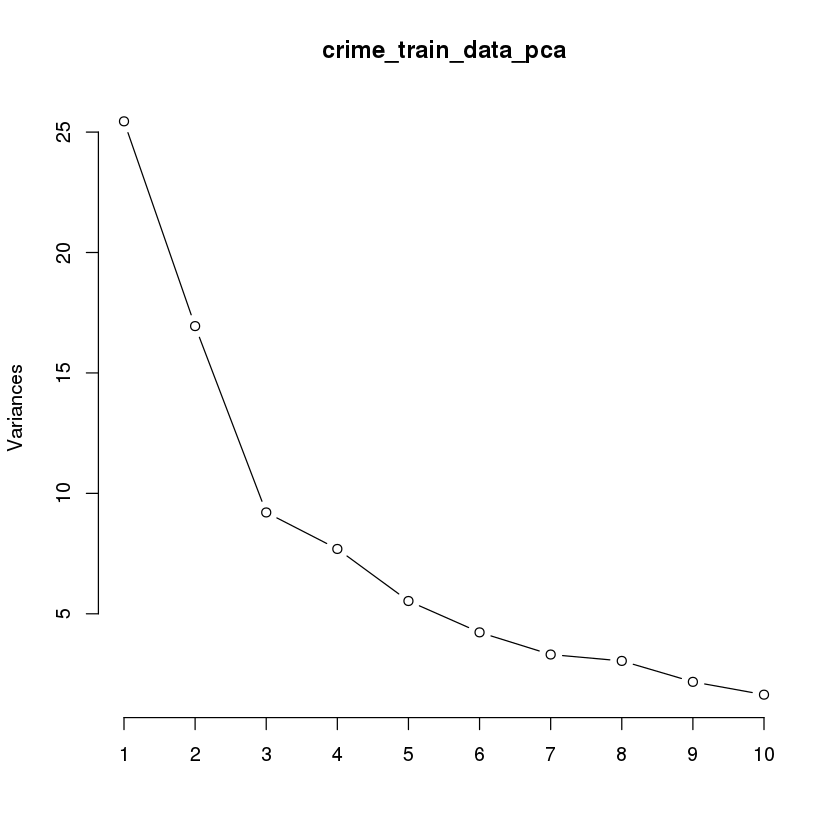

In [27]:
screeplot(crime_train_data_pca, type="lines")

The most obvious change in slope in the scree plot occurs at component 7, therefore first six components should be retained.

Another approach to decide on number of PCA components to choose is by using Kaiser’s criterion. It suggests that we should only retain principal components for which the variance is above 1 (on standardised variables). We can check this by finding the variance of each of the principal components. The standard deviations of PCA components are saved in a standard variable called sdev. you can access it in crime_train_data_pca dataframe.

In [28]:
(crime_train_data_pca$sdev)^2

[1] 2.544651e+01 1.694487e+01 9.208042e+00 7.692496e+00 5.531314e+00
  [6] 4.229116e+00 3.309296e+00 3.043717e+00 2.174571e+00 1.642411e+00
 [11] 1.563370e+00 1.522229e+00 1.380971e+00 1.066441e+00 9.956344e-01
 [16] 9.065574e-01 8.555192e-01 7.467982e-01 7.010342e-01 6.750860e-01
 [21] 6.584918e-01 6.381038e-01 5.868162e-01 5.595806e-01 5.210188e-01
 [26] 4.996138e-01 4.763121e-01 4.658653e-01 4.510405e-01 4.333831e-01
 [31] 3.901848e-01 3.840640e-01 3.660524e-01 3.460079e-01 3.187732e-01
 [36] 3.041540e-01 2.922328e-01 2.597588e-01 2.501818e-01 2.444826e-01
 [41] 2.346080e-01 2.237573e-01 2.126080e-01 2.030724e-01 2.004548e-01
 [46] 1.839492e-01 1.799244e-01 1.686884e-01 1.604103e-01 1.370179e-01
 [51] 1.361949e-01 1.280102e-01 1.069405e-01 1.006399e-01 9.979267e-02
 [56] 9.561350e-02 8.835818e-02 8.254007e-02 7.805146e-02 7.290981e-02
 [61] 6.636534e-02 6.408976e-02 6.280765e-02 6.060223e-02 5.588525e-02
 [66] 5.308123e-02 4.742881e-02 4.603142e-02 4.350595e-02 4.291355e-02
 [71] 3.806477e-02 3.764212e-02 3.563596e-02 3.430543e-02 3.177818e-02
 [76] 2.914116e-02 2.645696e-02 2.507916e-02 2.319420e-02 2.253928e-02
 [81] 2.019976e-02 1.871696e-02 1.768399e-02 1.726570e-02 1.565211e-02
 [86] 1.332646e-02 1.282026e-02 1.151969e-02 8.851315e-03 7.949138e-03
 [91] 5.963077e-03 5.302944e-03 4.902670e-03 3.933848e-03 3.656395e-03
 [96] 2.619965e-03 1.991955e-03 1.864655e-03 1.355102e-03 1.018723e-03
[101] 7.442454e-04 4.744990e-04

The components 1 through 14 have variance above 1. Using Kaiser’s criterion, we can retain first fourteen principal components.

One more method to decide on number of PCA components to retain is to keep few components required to explain at least some minimum amount of the total variance. For example, if you want to explain at least 70% of the variance, we will retain the first eight principal components, as we can see from the output of `summary(crime_train_data_pca)` that the first eight principal components explain 70% of the variance (while the first four components explain 56%).

### Scatter plots of Principal components


The values of the principal components are stored in a named element `x` of the variable returned by `prcomp()`. `x` contains a matrix where the first column contains the first principal component, the second column the second component, and so on.

Thus, `housing_prices_pca$x[,1]` contains the first principal component, and `housing_prices_pca$x[,2]` contains the second principal component.

We will make a scatterplot of the first two principal components.

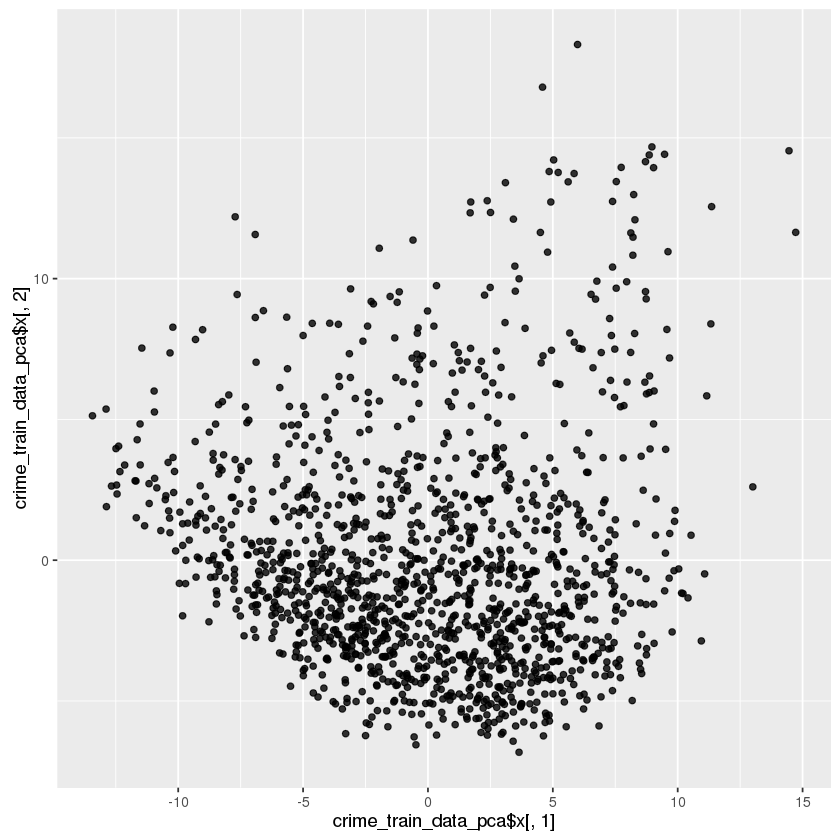

In [29]:
library(ggplot2)
pca_comp1_comp2 <- ggplot(crime_train_data, aes(x=crime_train_data_pca$x[,1],y=crime_train_data_pca$x[,2]))

pca_comp1_comp2+geom_point(alpha = 0.8)

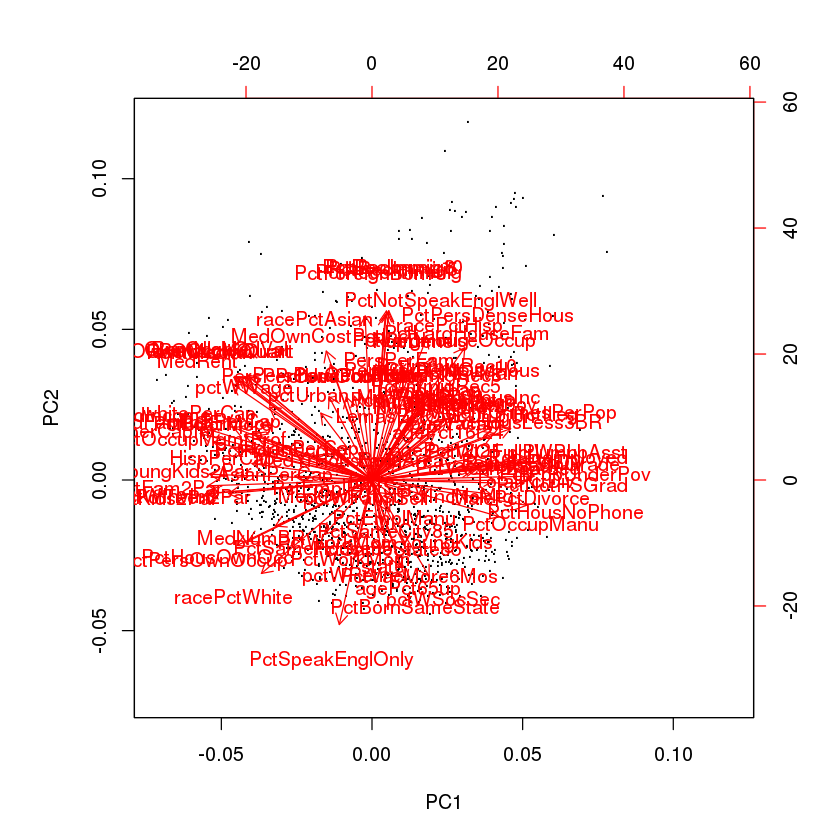

In [30]:
# Calculating total number of elements in the dataset
len = length(as.matrix(crime_train_data))/length(crime_train_data)
biplot(crime_train_data_pca, xlabs = rep( '.', len))